## Revise data for ICH prognosis

In [1]:
import numpy as np
import pandas as pd
import os

# Set data directory
directory = "/home/ubuntu/tenerife/data/ICH_nii_StrippedSkull"
# read images and corresponding labels from directory
goodPrognosis_images = sorted(os.listdir(os.path.join(directory, "GOOD_PROGNOSIS")))
print(f"Good prognosis images(0): {len(goodPrognosis_images)}")
PoorPrognosis_images = sorted(os.listdir(os.path.join(directory, "POOR_PROGNOSIS")))
print(f"Poor prognosis images (1): {len(PoorPrognosis_images)}")

# read CLINICAL DATA
clinical_data = pd.read_csv('/home/ubuntu/tenerife/data/ICH_tabular_data/CLINICAL_DATA_ICH.csv', delimiter=',')
clinical_data = clinical_data.rename(columns={'PatientID': 'Patient'})
# drop row where Patient is 213
clinical_data_filtered = clinical_data[~clinical_data['Patient'].isin([213])]
clinical_data_filtered = clinical_data_filtered.reset_index(drop=True)

images_all=[]
labels_all=[]
# loop over Patient in clinical_data
for i in range(len(clinical_data)):
    # get patient ID
    patientID = clinical_data['Patient'][i]
    # get label
    label = clinical_data['Label (poor_prognosis)'][i]
    # read corresponding image
    if label==0:
        # check that image exists
        if os.path.isfile(os.path.join(directory, "GOOD_PROGNOSIS", str(patientID) + "_brain.nii.gz")):
            images_all.append(os.path.join(directory, "GOOD_PROGNOSIS", str(patientID) + "_brain.nii.gz"))
            labels_all.append(label)
    elif label==1:
        # check that image exists
        if os.path.isfile(os.path.join(directory, "POOR_PROGNOSIS", str(patientID) + "_brain.nii.gz")):
            images_all.append(os.path.join(directory, "POOR_PROGNOSIS", str(patientID) + "_brain.nii.gz"))
            labels_all.append(label)
    else:
        print("ERROR: for Patient", patientID, "label not found")
print("Number of images:", len(images_all))
print("Number of labels:", len(labels_all))
images_all=np.array(images_all)
labels_all=np.array(labels_all)

Good prognosis images(0): 99
Poor prognosis images (1): 162
Number of images: 261
Number of labels: 261


In [2]:
import nibabel as nib
# check shape of images in images_all
depth_array = []
for i in range(len(images_all)):
    image = nib.load(images_all[i])
    # print("Image shape:", image.shape)
    # retrieve the image with largest and shortest shape in each of the dimensions
    depth_array.append(image.shape[-1])
    if i==0:
        max_shape = image.shape
        min_shape = image.shape
        max_depth = image.shape[-1]
        min_depth = image.shape[-1]
    else:
        if image.shape[1] > max_shape[1]:
            max_shape = image.shape
        if image.shape[1] < min_shape[1]:
            min_shape = image.shape
        if image.shape[-1] > max_depth:
            max_depth = image.shape[-1]
        if image.shape[-1] < min_depth:
            min_depth = image.shape[-1]
    # check if shape in dimensios 1 and 2 is the same
    if image.shape[0] != image.shape[1]:
        print("ERROR: image shape in dimensions 1 and 2 are not the same for image", images_all[i])


print("Max shape:", max_shape)
print("Min shape:", min_shape)
print("Max depth:", max_depth)
print("Min depth:", min_depth)

Max shape: (512, 512, 24)
Min shape: (512, 512, 24)
Max depth: 54
Min depth: 24


In [12]:
from collections import Counter
# count number of ocurrences in depth_array
counts = Counter(depth_array)

# Print the counts for each element
for item, count in counts.items():
    print(f'{item}: {count}')

24: 2
32: 96
47: 10
28: 103
52: 1
36: 5
35: 4
27: 8
30: 10
26: 3
29: 3
54: 1
43: 1
40: 2
31: 10
34: 1
49: 1


(array([  2.,   0.,   0.,   3.,   0.,   8.,   0., 103.,   3.,   0.,  10.,
          0.,  10.,   0.,  96.,   0.,   0.,   1.,   0.,   4.,   0.,   5.,
          0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,  10.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([24.        , 24.56603774, 25.13207547, 25.69811321, 26.26415094,
        26.83018868, 27.39622642, 27.96226415, 28.52830189, 29.09433962,
        29.66037736, 30.22641509, 30.79245283, 31.35849057, 31.9245283 ,
        32.49056604, 33.05660377, 33.62264151, 34.18867925, 34.75471698,
        35.32075472, 35.88679245, 36.45283019, 37.01886792, 37.58490566,
        38.1509434 , 38.71698113, 39.28301887, 39.8490566 , 40.41509434,
        40.98113208, 41.54716981, 42.11320755, 42.67924528, 43.24528302,
        43.81132075, 44.37735849, 44.94339623, 45.50943396, 46.0754717 ,
        46.64150943, 47.20754717, 47.77358491, 48.339622

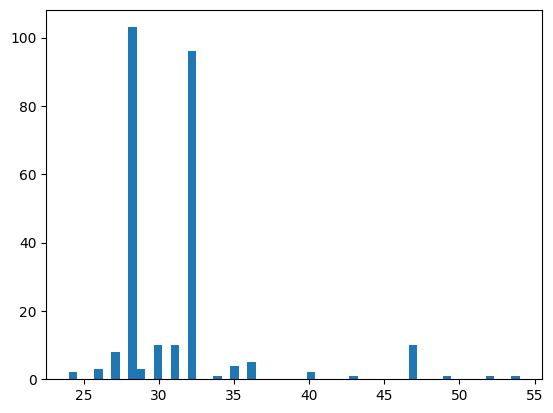

In [4]:
# plot histogram of depth_array
import matplotlib.pyplot as plt
plt.hist(depth_array, bins=53)

Text(0.5, 1.0, 'GCS distribution')

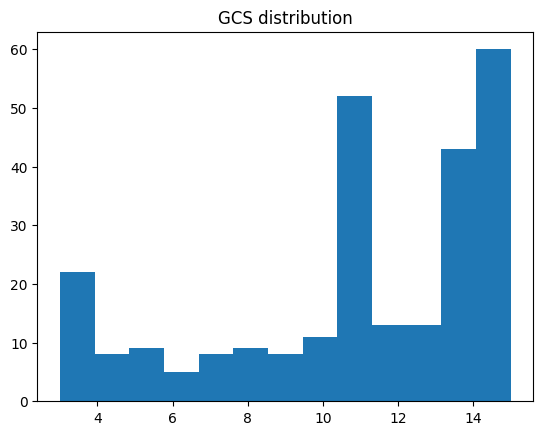

In [4]:
# print the distribution of GCS variable in clinical_data_filtered in a histogram
plt.hist(clinical_data_filtered['GCS'], bins=13)
plt.title('GCS distribution')

In [5]:
# calculate correlation between GCS and Prognosis
correlation = clinical_data_filtered['GCS'].corr(clinical_data_filtered['Label (poor_prognosis)'], method="spearman")
print("Correlation between GCS and Prognosis:", correlation)
# encode GCS as a binary variable
clinical_data_filtered['GCS_binary'] = clinical_data_filtered['GCS'].apply(lambda x: 1 if x<=8 else 0)
# calculate correlation between GCS_binary and Prognosis
correlation = clinical_data_filtered['GCS_binary'].corr(clinical_data_filtered['Label (poor_prognosis)'], method="spearman")
print("Correlation between GCS_binary and Prognosis:", correlation)

Correlation between GCS and Prognosis: -0.3425124588638338
Correlation between GCS_binary and Prognosis: 0.24513903108309307


In [28]:
clinical_data_filtered[['GCS', 'Label (poor_prognosis)', 'GCS_binary']].head(20)

,GCS,Label (poor_prognosis),GCS_binary
0,8,1,1
1,15,0,0
2,14,1,0
3,11,1,0
4,14,0,0
5,11,1,0
6,3,1,1
7,14,0,0
8,11,1,0
9,3,1,1


In [30]:
# correlate age with prognosis
correlation = clinical_data_filtered['Age'].corr(clinical_data_filtered['Label (poor_prognosis)'], method="spearman")
print("Correlation between Age and Prognosis:", correlation)
clinical_data_filtered[['Age', 'Label (poor_prognosis)', 'GCS_binary']].head(20)

Correlation between Age and Prognosis: 0.38921672343243296


,Age,Label (poor_prognosis),GCS_binary
0,74,1,1
1,78,0,0
2,79,1,0
3,88,1,0
4,43,0,0
5,86,1,0
6,79,1,1
7,79,0,0
8,78,1,0
9,52,1,1


In [38]:
clinical_data_filtered.columns

Index(['Patient', 'Label (poor_prognosis)', 'Gender', 'Age',
       'Antihypertensive_drugs', 'Smoker', 'Alcohol', 'HT', 'DM',
       'Dyslipidemia', 'MH_ICH', 'MH_CVD', 'MH_neuro', 'MH_dementia',
       'MH_cancer', 'MH_hematho', 'MH_others', 'Anticoagulant',
       'Antiaggregant', 'Calcium_antag', 'Alpha_blockers', 'Systolic_AP',
       'Dyastolic_AP', 'OxSat', 'Tº', 'HR', 'RF', 'PE_neuro', 'GCS', 'Glucose',
       'Creatinine', 'Urea', 'Sodium', 'Potassium', 'WBC', 'Hgb', 'Platelets',
       'MCV', 'RCDW', 'CMHC', 'MPV', 'INR', 'Fibrinogen', 'Cause_head_trauma',
       'GCS_binary'],
      dtype='object')

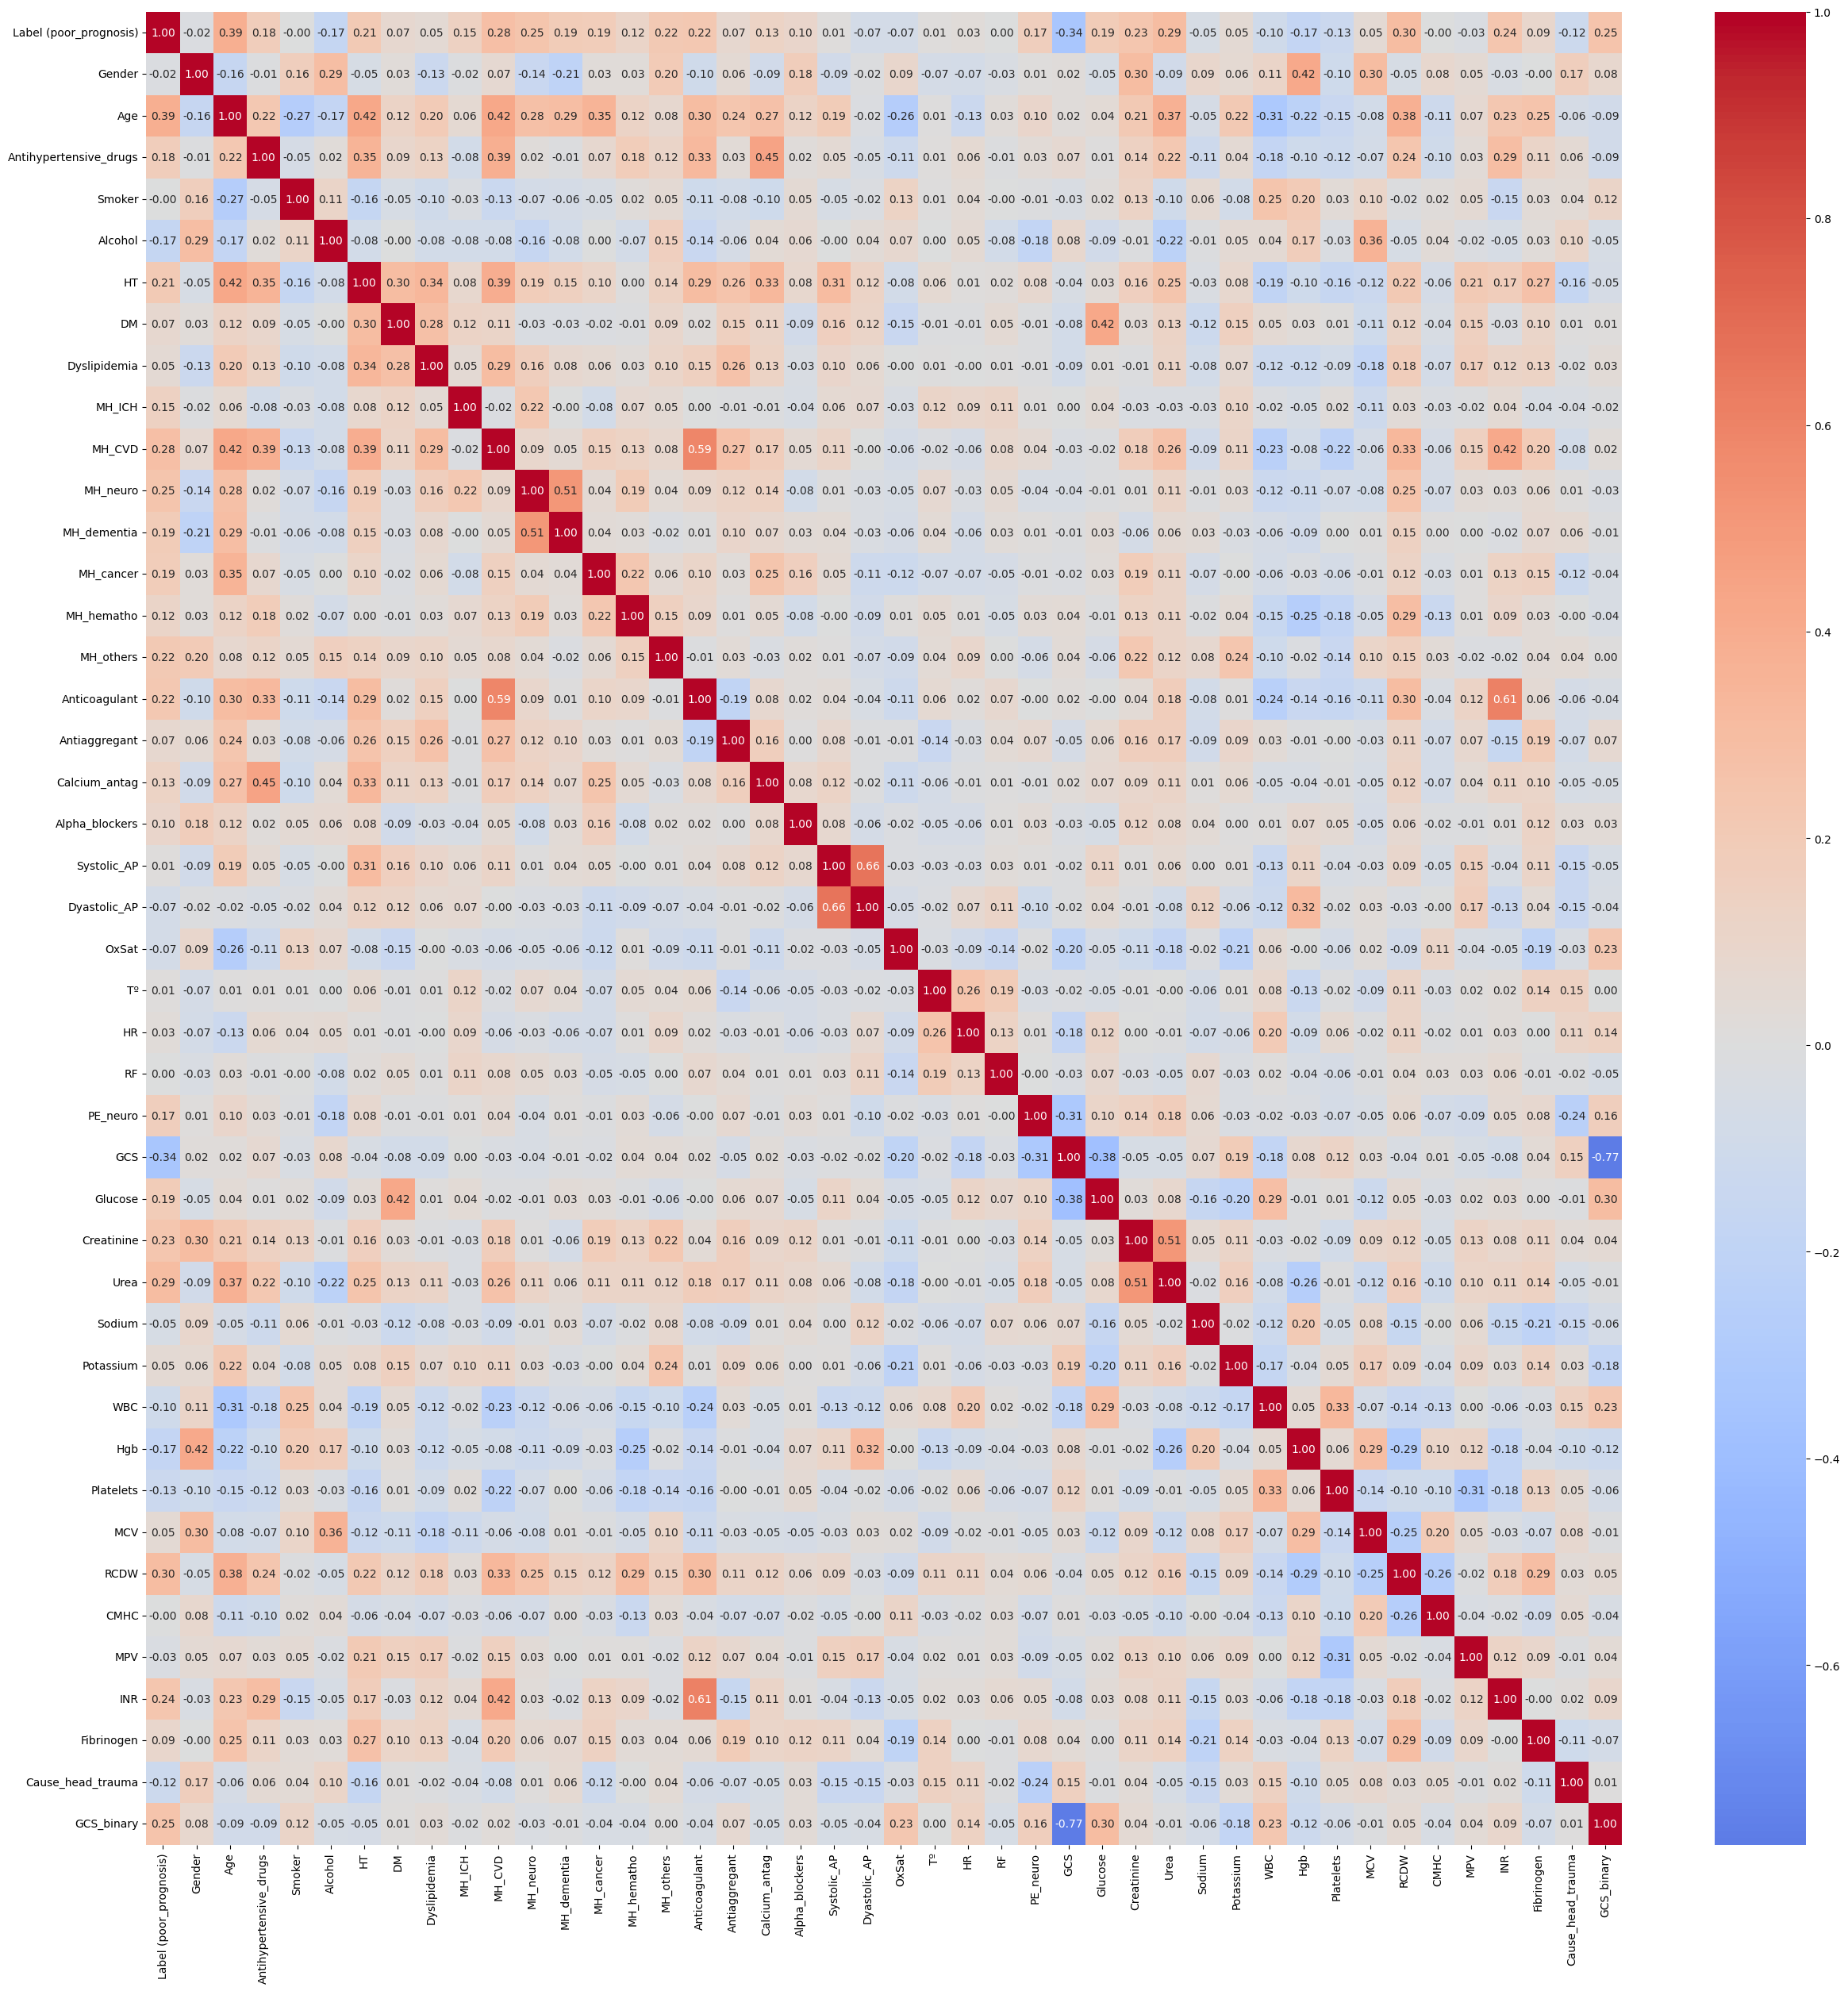

In [45]:
# calculate correlations between all variables and plot in heatmap
correlation_matrix = clinical_data_filtered[['Label (poor_prognosis)', 'Gender', 'Age',
       'Antihypertensive_drugs', 'Smoker', 'Alcohol', 'HT', 'DM',
       'Dyslipidemia', 'MH_ICH', 'MH_CVD', 'MH_neuro', 'MH_dementia',
       'MH_cancer', 'MH_hematho', 'MH_others', 'Anticoagulant',
       'Antiaggregant', 'Calcium_antag', 'Alpha_blockers', 'Systolic_AP',
       'Dyastolic_AP', 'OxSat', 'Tº', 'HR', 'RF', 'PE_neuro', 'GCS', 'Glucose',
       'Creatinine', 'Urea', 'Sodium', 'Potassium', 'WBC', 'Hgb', 'Platelets',
       'MCV', 'RCDW', 'CMHC', 'MPV', 'INR', 'Fibrinogen', 'Cause_head_trauma',
       'GCS_binary']].corr(method="spearman") 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.show()
